In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent

preds = np.load(PROJECT_ROOT / "data" / "processed" / "tft_predictions.npy")
targets = pd.read_parquet(PROJECT_ROOT / "data" / "processed" / "target.parquet")

print("Preds shape:", preds.shape)
print("Targets columns:", targets.columns)


Preds shape: (181554, 24)
Targets columns: Index(['station_name', 'window_start', 'sessions_this_hour',
       'target_next_hour'],
      dtype='object')


In [ ]:
targets.head()


Pred path: c:\Users\Dell\ev_charging_congestion_system\data\processed\tft_predictions.npy
Target path: c:\Users\Dell\ev_charging_congestion_system\data\processed\target.parquet
Predictions shape: (181554, 24)
Targets shape: (234867, 4)


In [6]:
targets.columns


Index(['station_name', 'window_start', 'sessions_this_hour',
       'target_next_hour'],
      dtype='object')

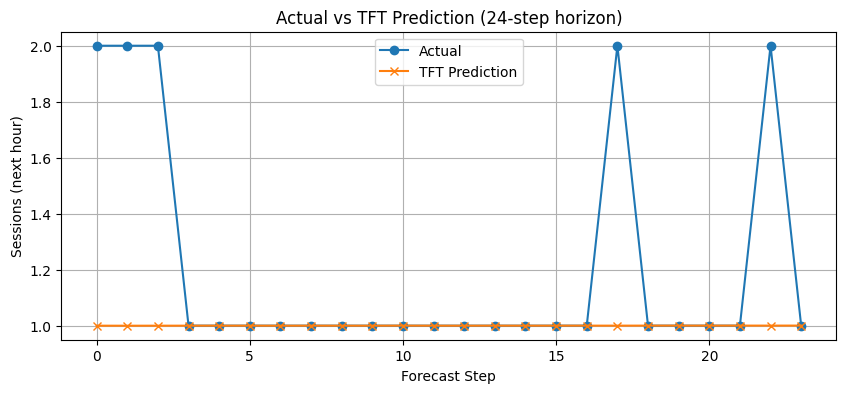

In [7]:
TARGET_COL = "target_next_hour"
idx = np.random.randint(0, len(preds) - 24)

actual = targets[TARGET_COL].iloc[idx:idx+24].values
predicted = preds[idx]

plt.figure(figsize=(10, 4))
plt.plot(actual, label="Actual", marker="o")
plt.plot(predicted, label="TFT Prediction", marker="x")

plt.title("Actual vs TFT Prediction (24-step horizon)")
plt.xlabel("Forecast Step")
plt.ylabel("Sessions (next hour)")
plt.legend()
plt.grid(True)
plt.show()
